In [34]:
import dill
import pandas as pd
import os
import random

In [126]:
TRAIN_STATS = dill.load(open('training_stats.pkd','rb'))
BASELINE_DIR = 'trajectories_gemini'
TRAINDATA_DIR = 'trajectories_train'
TEST_DIR = 'trajectories_test'
ENVS = {
 'click-tab-2-hard':20,
 'social-media':15,
 'email-inbox':30,
 'social-media-some':30,
 'tic-tac-toe':10,
 'use-autocomplete':10,
 'book-flight':30,
 'choose-date':20,
 'search-engine':20
,'click-checkboxes-soft':10}

In [127]:
def get_stats(env_name, source_dir):  
    files = os.listdir(source_dir)
    total_files = 0
    none_rewards = 0
    zero_rewards = 0
    pos_rewards = 0
    neg_rewards = 0
    for file in files:
        if env_name not in file:
            continue
        total_files += 1
        filename = os.path.join(source_dir,file)
        trajectory = dill.load(open(filename,'rb'))
        if trajectory['reward'] is None:
            none_rewards +=1
            continue
        if trajectory['reward'] < 0:
            neg_rewards +=1
            continue
        if trajectory['reward'] == 0:
            zero_rewards +=1
            continue
        pos_rewards +=1
    stats = [{'env_name':env_name, 'trajectories':total_files, 'none_rewards':none_rewards,'neg_rewards':neg_rewards
              ,'zero_rewards':zero_rewards,'pos_rewards':pos_rewards,'pct_reward':pos_rewards/total_files}]
    return pd.DataFrame(stats)
def run_dataset_analysis(directory, model=None):
    df_env_summary = pd.DataFrame()
    if model is None:
        test_envs = ENVS
        path_str = directory + '/{}'
    else:
        if model == 'click-tab-2-hard':
            test_envs = ['click-tab-2-hard']
        elif model == 'book-flight':
            test_envs = ['book-flight']
        elif model == 'book-flight1':
            test_envs = ['book-flight','choose-date']
        elif model == 'choose-date':
            test_envs = ['choose-date']
        elif model == 'choose-date1':
            test_envs = ['choose-date']
        elif model == 'choose-date3':
            test_envs = ['choose-date']
        elif model == 'search-engine':
            test_envs = ['search-engine']
        elif model == 'social-media-some1':
            test_envs = ['social-media-some']
        elif model == 'social-media-some2':
            test_envs = ['social-media-some']
        elif model == 'click-checkboxes-soft':
            test_envs = ['click-checkboxes-soft']
        elif model in ['partial','full','full1']:
            test_envs = ENVS
        path_str = '{}/model_{}/'.format(directory,model)
    for environment in test_envs:
        df = get_stats(environment,path_str.format(environment))
        df_env_summary = pd.concat([df_env_summary,df])
    return df_env_summary

In [27]:
run_dataset_analysis(BASELINE_DIR)

,env_name,trajectories,none_rewards,neg_rewards,zero_rewards,pos_rewards,pct_reward
0,click-tab-2-hard,60,17,24,0,19,0.316667
0,social-media,60,0,5,34,21,0.350000
0,email-inbox,60,16,3,23,18,0.300000
0,social-media-some,60,0,23,34,3,0.050000
0,tic-tac-toe,63,0,11,48,4,0.063492
0,use-autocomplete,60,0,41,19,0,0.000000
0,book-flight,60,0,13,47,0,0.000000
0,choose-date,60,1,12,47,0,0.000000
0,search-engine,12,0,2,10,0,0.000000
0,click-checkboxes-soft,62,3,3,37,19,0.306452


In [41]:
run_dataset_analysis(TRAINDATA_DIR)

,env_name,trajectories,none_rewards,neg_rewards,zero_rewards,pos_rewards,pct_reward
0,click-tab-2-hard,100,0,0,0,100,1.000000
0,social-media,126,0,6,14,106,0.841270
0,email-inbox,108,0,0,0,108,1.000000
0,social-media-some,158,0,3,0,155,0.981013
0,tic-tac-toe,147,0,46,1,100,0.680272
0,use-autocomplete,105,0,4,0,101,0.961905
0,book-flight,187,0,45,31,111,0.593583
0,choose-date,107,0,0,0,107,1.000000
0,search-engine,100,0,6,0,94,0.940000
0,click-checkboxes-soft,106,0,0,0,106,1.000000


In [21]:
run_dataset_analysis(TEST_DIR,'partial')

,env_name,trajectories,none_rewards,neg_rewards,zero_rewards,pos_rewards,pct_reward
0,click-tab-2-hard,51,0,7,0,44,0.862745
0,social-media,102,0,38,0,64,0.627451
0,email-inbox,51,0,1,0,50,0.980392
0,social-media-some,51,0,38,0,13,0.254902
0,tic-tac-toe,51,0,31,0,20,0.392157
0,use-autocomplete,51,0,24,1,26,0.509804
0,book-flight,51,0,40,0,11,0.215686
0,choose-date,51,0,50,0,1,0.019608
0,search-engine,51,0,41,0,10,0.196078
0,click-checkboxes-soft,51,0,33,9,9,0.176471


In [22]:
run_dataset_analysis(TEST_DIR,'click-tab-2-hard')

,env_name,trajectories,none_rewards,neg_rewards,zero_rewards,pos_rewards,pct_reward
0,click-tab-2-hard,49,0,4,0,45,0.918367


In [23]:
run_dataset_analysis(TEST_DIR,'book-flight')

,env_name,trajectories,none_rewards,neg_rewards,zero_rewards,pos_rewards,pct_reward
0,book-flight,52,0,45,0,7,0.134615


In [29]:
run_dataset_analysis(TEST_DIR,'choose-date')

,env_name,trajectories,none_rewards,neg_rewards,zero_rewards,pos_rewards,pct_reward
0,choose-date,52,0,49,0,3,0.057692


In [32]:
run_dataset_analysis(TEST_DIR,'search-engine')

,env_name,trajectories,none_rewards,neg_rewards,zero_rewards,pos_rewards,pct_reward
0,search-engine,52,0,13,0,39,0.75


In [44]:
run_dataset_analysis(TEST_DIR,'choose-date1')##trained with search engine data

,env_name,trajectories,none_rewards,neg_rewards,zero_rewards,pos_rewards,pct_reward
0,choose-date,52,0,48,0,4,0.076923


In [56]:
run_dataset_analysis(TEST_DIR,'book-flight1')

,env_name,trajectories,none_rewards,neg_rewards,zero_rewards,pos_rewards,pct_reward
0,book-flight,52,0,45,0,7,0.134615
0,choose-date,52,0,51,0,1,0.019231


In [65]:
run_dataset_analysis(TEST_DIR,'social-media-some1')

,env_name,trajectories,none_rewards,neg_rewards,zero_rewards,pos_rewards,pct_reward
0,social-media-some,52,0,45,0,7,0.134615


In [66]:
run_dataset_analysis(TEST_DIR,'click-checkboxes-soft')

,env_name,trajectories,none_rewards,neg_rewards,zero_rewards,pos_rewards,pct_reward
0,click-checkboxes-soft,52,0,26,10,16,0.307692


In [94]:
run_dataset_analysis(TEST_DIR,'full')

,env_name,trajectories,none_rewards,neg_rewards,zero_rewards,pos_rewards,pct_reward
0,click-tab-2-hard,52,0,6,0,46,0.884615
0,social-media,104,0,42,0,62,0.596154
0,email-inbox,52,0,0,0,52,1.000000
0,social-media-some,52,0,39,0,13,0.250000
0,tic-tac-toe,52,0,29,0,23,0.442308
0,use-autocomplete,52,0,24,0,28,0.538462
0,book-flight,52,0,31,0,21,0.403846
0,choose-date,52,0,47,0,5,0.096154
0,search-engine,52,0,3,0,49,0.942308
0,click-checkboxes-soft,52,0,20,7,25,0.480769


In [121]:
run_dataset_analysis(TEST_DIR,'social-media-some2')

,env_name,trajectories,none_rewards,neg_rewards,zero_rewards,pos_rewards,pct_reward
0,social-media-some,52,0,49,0,3,0.057692


In [125]:
run_dataset_analysis(TEST_DIR,'choose-date3')

,env_name,trajectories,none_rewards,neg_rewards,zero_rewards,pos_rewards,pct_reward
0,choose-date,52,0,49,0,3,0.057692


In [129]:
run_dataset_analysis(TEST_DIR,'full1')

,env_name,trajectories,none_rewards,neg_rewards,zero_rewards,pos_rewards,pct_reward
0,click-tab-2-hard,52,0,6,0,46,0.884615
0,social-media,104,0,43,0,61,0.586538
0,email-inbox,52,0,22,0,30,0.576923
0,social-media-some,52,0,42,0,10,0.192308
0,tic-tac-toe,52,0,25,0,27,0.519231
0,use-autocomplete,52,0,52,0,0,0.000000
0,book-flight,52,0,52,0,0,0.000000
0,choose-date,52,0,48,0,4,0.076923
0,search-engine,52,0,52,0,0,0.000000
0,click-checkboxes-soft,52,0,13,8,31,0.596154


### Analyze individual trajectories

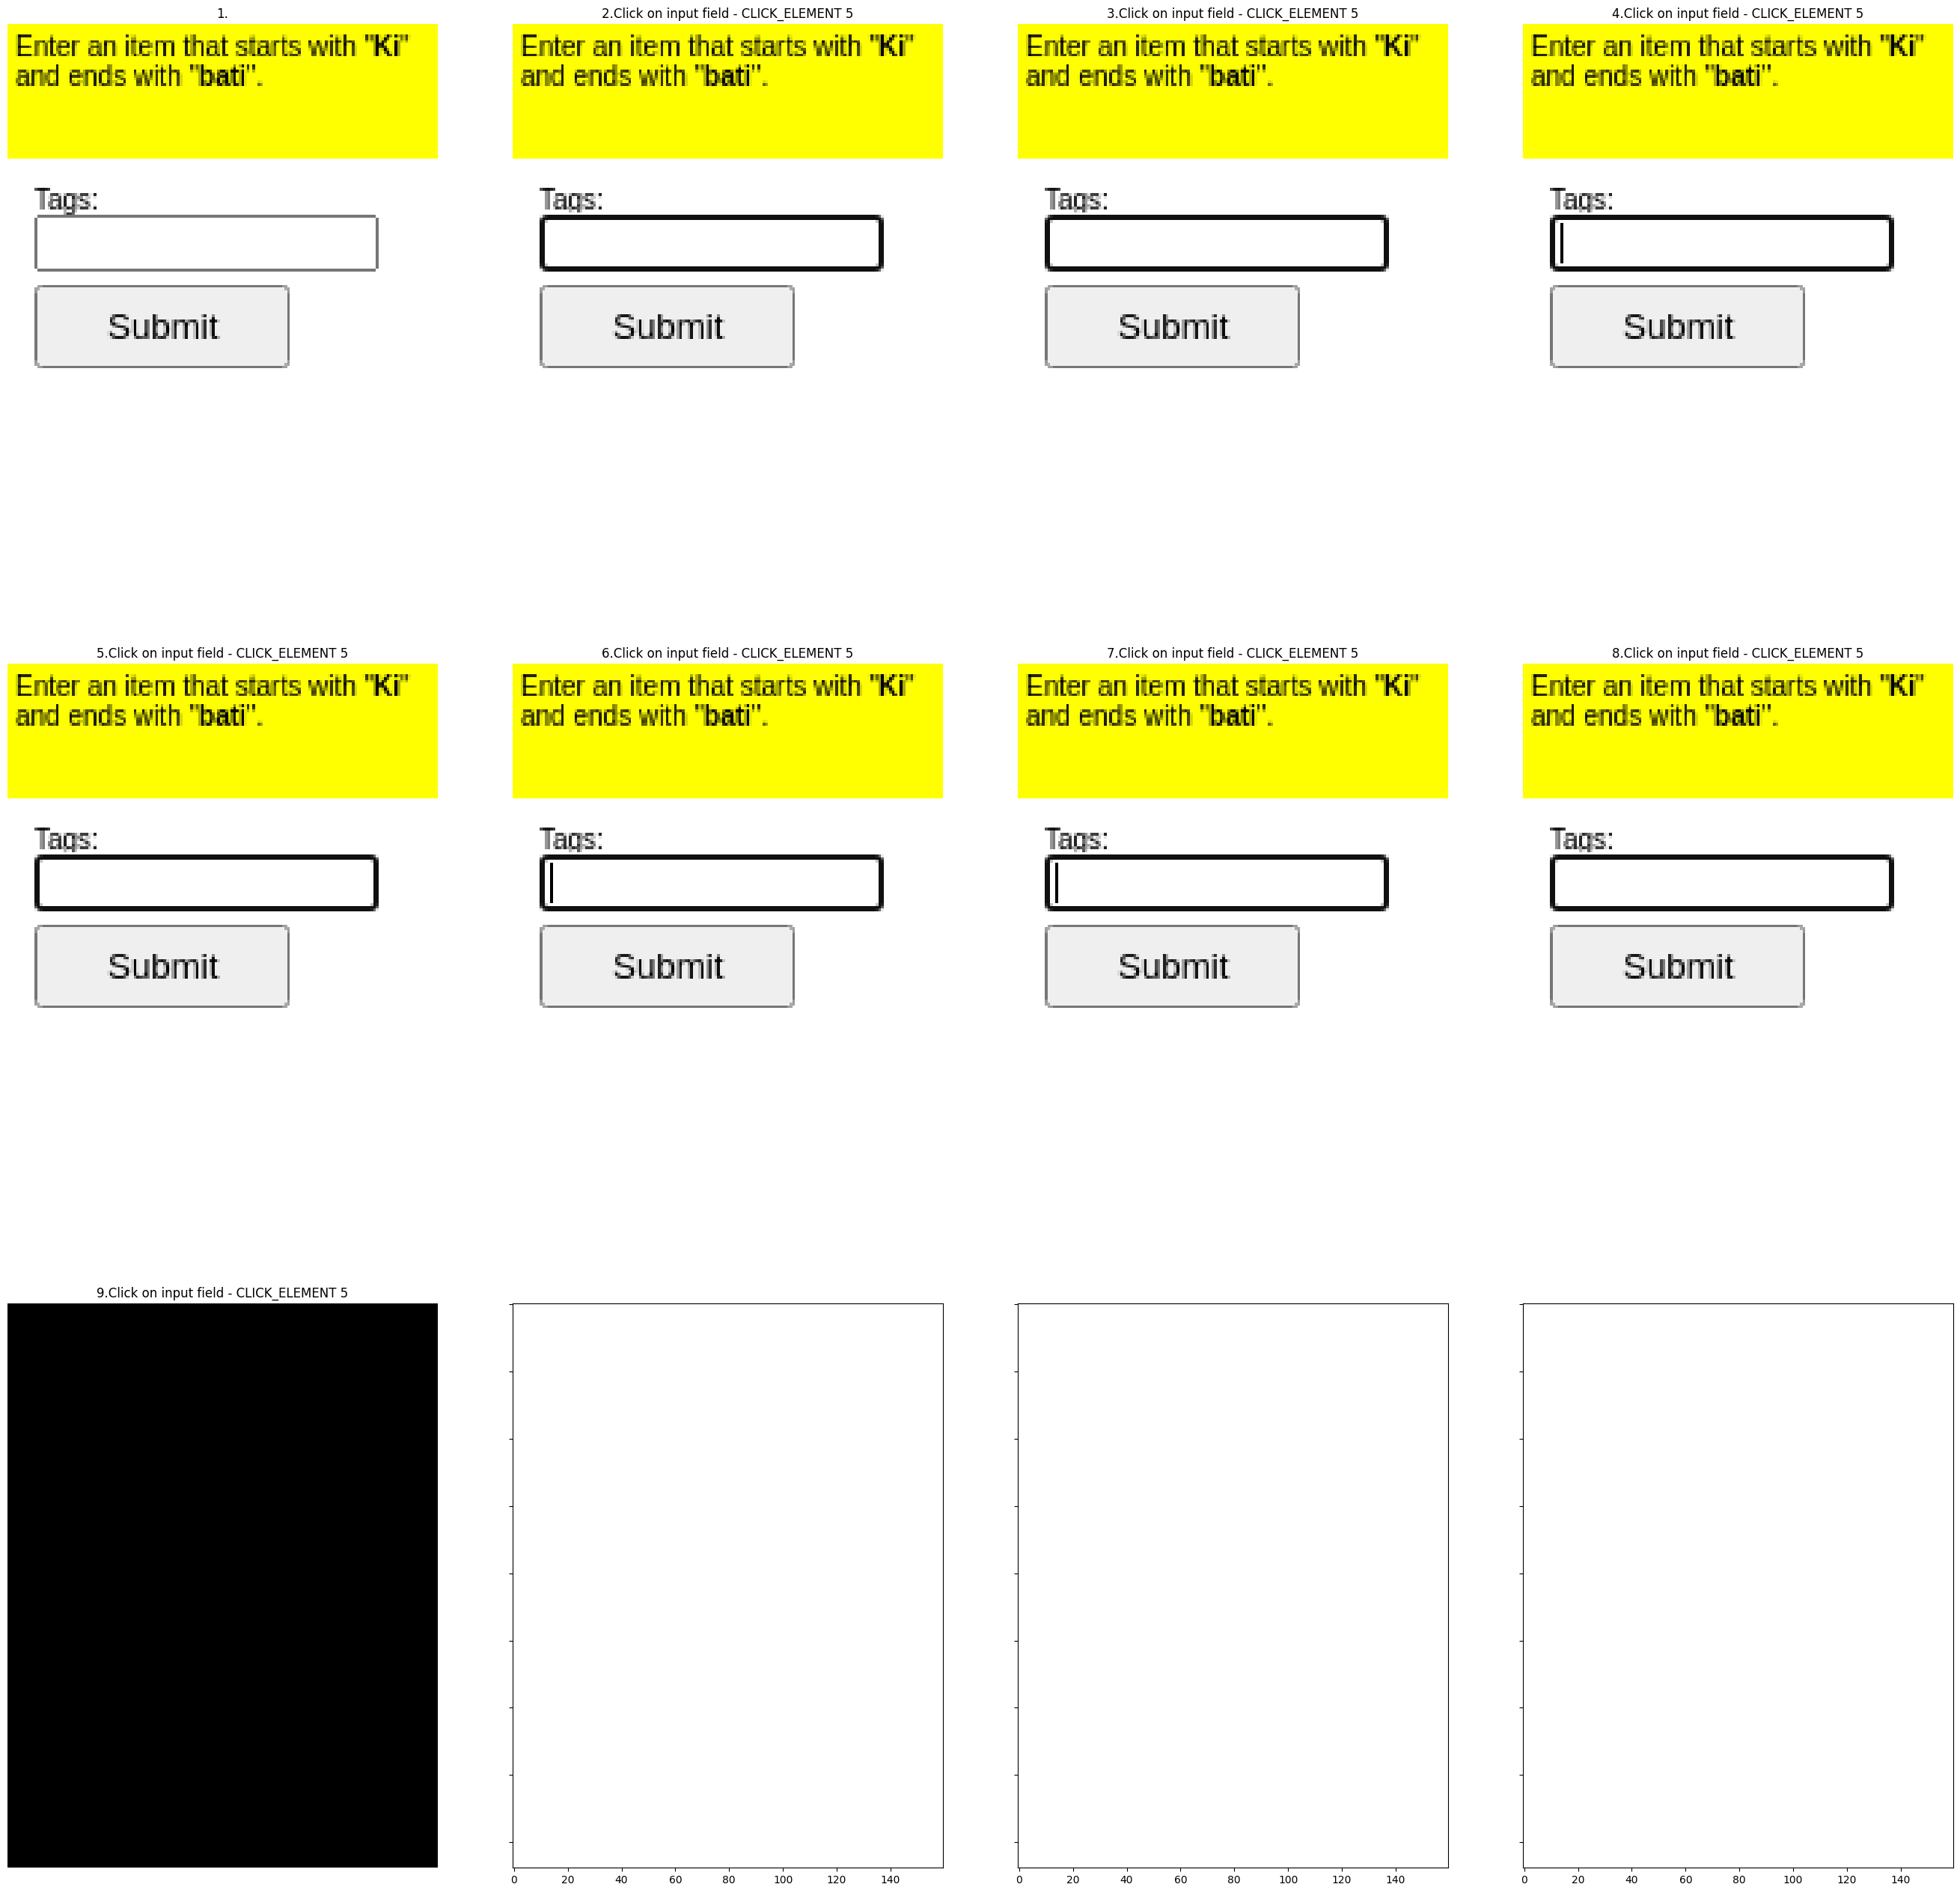

In [132]:
def plot_trajectory(trajectory, cols=4, filename = 'trajectory.png'):
    from mpl_toolkits.axes_grid1 import ImageGrid
    import matplotlib.image as mpimg
    import matplotlib.pyplot as plt
    import math
    '''Plots screenshots of every observation in a trajectory
    input: images (list of np.arrays)
           actions (list of strings from parse_response 'action_text') 
           cols (int - number of columns for constructing the grid)
           filename (str with filename where to save the trajectory picture)'''
    actions = [x['action'] for x in trajectory['states']]
    images = [x['screenshot'] for x in trajectory['states']]
    rows = math.ceil(len(images) / cols)

    fig = plt.figure(figsize=(12*rows,8*cols))
    grid = ImageGrid(fig, 111, nrows_ncols = (rows,cols), axes_pad = 1)
    titles = ['{}.{}'.format(x[0]+1,x[1]) for x in enumerate(actions)]
    for i,image in enumerate(images):
        grid[i].axis('off')
        grid[i].set_title(titles[i])
        grid[i].imshow(image.astype(int))
    plt.savefig(filename,bbox_inches='tight')

trajectory = dill.load(open('trajectories_test/model_full1/use-autocomplete036.pkd', 'rb'))
plot_trajectory(trajectory)

In [133]:
print(trajectory['utterance'])
print(trajectory['reward'])
[x['action'] for x in trajectory['states']]

Enter an item that starts with "Ki" and ends with "bati".
-1.0


['',
 'Click on input field - CLICK_ELEMENT 5',
 'Click on input field - CLICK_ELEMENT 5',
 'Click on input field - CLICK_ELEMENT 5',
 'Click on input field - CLICK_ELEMENT 5',
 'Click on input field - CLICK_ELEMENT 5',
 'Click on input field - CLICK_ELEMENT 5',
 'Click on input field - CLICK_ELEMENT 5',
 'Click on input field - CLICK_ELEMENT 5']

In [113]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
trajectory['states'][1]['dom_elements']

({'ref': 1,
  'parent': 0,
  'left': array([0.], dtype=float32),
  'top': array([0.], dtype=float32),
  'width': array([500.], dtype=float32),
  'height': array([210.], dtype=float32),
  'tag': 'body',
  'text': '',
  'value': '',
  'id': '',
  'classes': '',
  'bg_color': array([0.33333334, 0.33333334, 0.33333334, 1.        ], dtype=float32),
  'fg_color': array([0., 0., 0., 1.], dtype=float32),
  'flags': array([1, 0, 0, 0], dtype=int8)},
 {'ref': 2,
  'parent': 1,
  'left': array([0.], dtype=float32),
  'top': array([0.], dtype=float32),
  'width': array([160.], dtype=float32),
  'height': array([210.], dtype=float32),
  'tag': 'div',
  'text': '',
  'value': '',
  'id': 'wrap',
  'classes': '',
  'bg_color': array([1., 1., 1., 1.], dtype=float32),
  'fg_color': array([0., 0., 0., 1.], dtype=float32),
  'flags': array([0, 0, 0, 0], dtype=int8)},
 {'ref': 3,
  'parent': 2,
  'left': array([0.], dtype=float32),
  'top': array([50.], dtype=float32),
  'width': array([160.], dtype=float

In [72]:
pip install together

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install scikit-learn

     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     --------------------------------------- 0.0/11.0 MB 217.9 kB/s eta 0:00:51
     --------------------------------------- 0.0/11.0 MB 217.9 kB/s eta 0:00:51
     --------------------------------------- 0.0/11.0 MB 245.8 kB/s eta 0:00:45
     --------------------------------------- 0.1/11.0 MB 301.2 kB/s eta 0:00:37
     --------------------------------------- 0.1/11.0 MB 420.8 kB/s eta 0:00:26
      -------------------------------------- 0.2/11.0 MB 586.1 kB/s eta 0:00:19
      -------------------------------------- 0.2/11.0 MB 684.7 kB/s eta 0:00:16
     - ------------------------------------- 0.3/11.0 MB 873.8 kB/s eta 0:00:13
     - -------------------------------------- 0.5/11.0 MB 1.1 MB/s eta 0:00:10
     -- ------------------------------------- 0.6/11.0 MB 1.2 MB/s eta 0:00:09
     -- ------------------------------------- 0.7/11.0 MB 

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
from typing import List
from together import Together

client = Together(api_key='dcbe550aeb2c478d292bd89de106c79a9b706315d096d71353ab44aea2a0c22a')

def get_embeddings(texts: List[str], model: str) -> List[List[float]]:
    texts = [text.replace("\n", " ") for text in texts]
    outputs = client.embeddings.create(model=model, input=texts)
    return [outputs.data[i].embedding for i in range(len(texts))]

input_texts = ['Our solar system orbits the Milky Way galaxy at about 515,000 mph']
embeddings = get_embeddings(input_texts, model='togethercomputer/m2-bert-80M-8k-retrieval')


In [21]:
cosine_similarity(embeddings,embeddings)

array([[1.]])

In [40]:
def get_benchmark_trajectory(env_name):
    number = random.choice(range(50))
    filename = TRAIN_STATS[TRAIN_STATS.env_name == env_name].filename.values[number]
    trajectory = dill.load(open(filename,'rb'))
    actions = [x['action'] for x in trajectory['states'][1:]]
    print(env_name)
    print(trajectory['utterance'])
    print(['{} - {}'.format(x[0]+1,x[1]) for x in enumerate(actions)])
    return actions
    
def create_benchmarks():
    ''' returns dictionary with one benchmark trajectory for each environment'''
    benchmarks = {}
    for env_name in ENVS:
        benchmarks[env_name] = get_benchmark_trajectory(env_name)
    return benchmarks
create_benchmarks()

click-tab-2-hard
Switch between the tabs to find and click on the link "id".
['1 - Click on tab number 2 because the link was not found in tab 1 - CLICK_ELEMENT 8', '2 - Click on link id  - CLICK_ELEMENT 24']
social-media
For the user @leonie, click on the "Mute" button.
['1 - Look for the tweet by @leonie and click on the MORE button (3 dots) - CLICK_ELEMENT 42', '2 - Select the Mute option from the MORE dropdown menu - CLICK_ELEMENT 86']
email-inbox
Find the email by Nelli and forward that email to Cal.
['1 - Click on the thread by Nelli - CLICK_ELEMENT 28', '2 - Click on the Forward icon - CLICK_ELEMENT 72', '3 - Click on the input box next to the word To - CLICK_ELEMENT 80', '4 - Type Cal on the input box next to the word To - TYPE_TEXT 80', '5 - Click on the send-forward icon - CLICK_ELEMENT 76']
social-media-some
Click the "Share" button on 2 posts by @adipiscing and then click Submit.
['1 - Look for a tweet by @adipiscing and click on the Share button - CLICK_ELEMENT 93', '2 - L

{'click-tab-2-hard': ['Click on tab number 2 because the link was not found in tab 1 - CLICK_ELEMENT 8',
  'Click on link id  - CLICK_ELEMENT 24'],
 'social-media': ['Look for the tweet by @leonie and click on the MORE button (3 dots) - CLICK_ELEMENT 42',
  'Select the Mute option from the MORE dropdown menu - CLICK_ELEMENT 86'],
 'email-inbox': ['Click on the thread by Nelli - CLICK_ELEMENT 28',
  'Click on the Forward icon - CLICK_ELEMENT 72',
  'Click on the input box next to the word To - CLICK_ELEMENT 80',
  'Type Cal on the input box next to the word To - TYPE_TEXT 80',
  'Click on the send-forward icon - CLICK_ELEMENT 76'],
 'social-media-some': ['Look for a tweet by @adipiscing and click on the Share button - CLICK_ELEMENT 93',
  'Look for a tweet by @adipiscing and click on the Share button - CLICK_ELEMENT 113',
  'Click on the Submit button - CLICK_ELEMENT 115'],
 'tic-tac-toe': ['Click on any empty square - CLICK_ELEMENT 5',
  'Click on a square in a row, column or diagonal 

In [ ]:
def get_baseline_trajectory(env_name):
    filename = TRAIN_STATS[TRAIN_STATS.env_name == env_name].filename.values[0]
    trajectory = dill.load(open(filename,'rb'))
    actions = [x['action'] for x in trajectory['states'][1:]]
    print(env_name)
    print(trajectory['utterance'])
    print(['{} - {}'.format(x[0]+1,x[1]) for x in enumerate(actions)])
    return actions